<a href="https://colab.research.google.com/github/Anas008-ui/Revenue-Management-Analysis/blob/main/Revenue_Management_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Revenue and Pricing Strategy Analysis**


==> Strategies for optimizing room rates and revenue are critical for addressing booking behavior and increasing profitability.

In [ ]:
import pandas as pd
import plotly.express as px

# ==> import and explore data

**Datasets**

We have 5 csv filed

*   dim_data.csv
*   dim_hotels.csv
*   dim_rooms.csv
*   fact_aggregated_bookings.csv
*   fact_bookings.csv
















Read booking information into a data frame

In [ ]:
df_bookings = pd.read_csv('/fact_bookings.csv')


Extract fact bookings

In [ ]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [ ]:
df_bookings.shape

(134590, 12)

In [ ]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [ ]:
df_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [ ]:
df_bookings.room_category.value_counts()

,count
room_category,
RT2,49505
RT1,38446
RT3,30566
RT4,16073


In [ ]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


In [ ]:
booking_counts=df_bookings['booking_platform'].value_counts()

fig=px.bar(booking_counts, x=booking_counts.values, y=booking_counts.index, color=booking_counts.index)

fig.show()

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


Examine files

In [ ]:
df_date = pd.read_csv('/dim_date.csv')
df_hotels = pd.read_csv('/dim_hotels.csv')
df_rooms = pd.read_csv('/dim_rooms.csv')
df_agg_bookings = pd.read_csv('/fact_aggregated_bookings.csv')

In [ ]:
df_hotels.shape

(25, 4)

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Radison Elite,Luxury,Delhi
1,16559,Radison standard,Luxury,Mumbai
2,16560,Radison City,Business,Delhi


In [ ]:
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


<Axes: xlabel='city'>

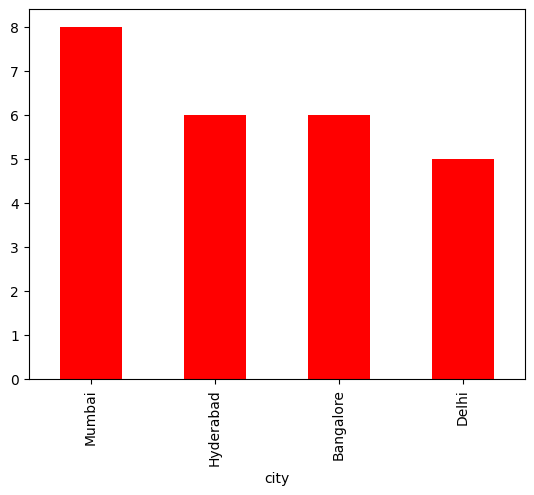

In [ ]:
df_hotels.city.value_counts().plot(kind='bar',color='red')

Extract aggregated booking

In [ ]:
df_agg_bookings.shape

(9200, 5)

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


Exercise:1 Find out unique property ids in aggregate bookings dataset

In [ ]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

Exercise:2 Find out total bookings per property id

In [ ]:
df_agg_bookings.groupby('property_id')[['successful_bookings',"col2"]].agg(["sum","count"])

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


Exercise:3 Find out days on which bookings are greater than capacity

In [ ]:
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


Exercise:4 Find out properties that have highest capacity

In [ ]:
# prompt: Find out properties that have highest capacity

df_agg_bookings.sort_values(by=['capacity'], ascending=False).head(10)


# ==> Data Cleaning

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


Filter invalid clients

In [ ]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


The number of customers with values less than zero represents a data error that can be ignored.

In [ ]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
df_bookings.shape

(134578, 12)

Clear outliers in revenue generated

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [ ]:
avg,std

(15378.036937686695, 93040.1549314641)

In [ ]:
higher_limit = avg + 3*std


In [ ]:
higher_limit

294498.50173207896

In [ ]:
lower_limit = avg - 3*std


In [ ]:
lower_limit

-263742.4278567056

In [ ]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [ ]:
df_bookings.revenue_generated.describe()

,revenue_generated
count,1.345780e+05
mean,1.537804e+04
std,9.304015e+04
min,6.500000e+03
25%,9.900000e+03
50%,1.350000e+04
75%,1.800000e+04
max,2.856000e+07


In [ ]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,134578.000000
mean,12696.011822
std,6927.841641
min,2600.000000
25%,7600.000000
50%,11700.000000
75%,15300.000000
max,45220.000000


In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.53674501214

The dataframe reveals all rooms are RT4, indicating a presidential suit type, indicating higher rent. A fair analysis should focus on RT4 room types.

In [ ]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

,revenue_realized
count,16071.000000
mean,23439.308444
std,9048.599076
min,7600.000000
25%,19000.000000
50%,26600.000000
75%,32300.000000
max,45220.000000


In [ ]:
#mean + 3*STD

23439+3*9048

50583

The dataframe shows a maximum revenue realized of 45220, indicating no outliers and no need for data cleaning on this particular column.

In [ ]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77899
booking_status,0


The dataframe contains 134576 values, 77899 of which have a null rating. It is not suggested to filter and replace these data with median or mean ratings.

Exercise:1
In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [ ]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [ ]:
df_agg_bookings.capacity.fillna(0,inplace=True)

In [ ]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,0


Exercise:2 In aggregate bookings find out records that have successful bookings value greater than capacity. Filter those records



In [ ]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
8,17561,1-May-22,RT1,22,0.0
12,16563,1-May-22,RT1,100,41.0
14,17562,1-May-22,RT1,12,0.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# ==> Data Transformation

Create an occupancy % column in the aggregated booking dataset

In [ ]:
df_agg_bookings.shape

(9200, 5)

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [ ]:
25/30

0.8333333333333334

In [ ]:
df_agg_bookings['ocp'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [ ]:
df_agg_bookings.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,property_id,check_in_date,room_category,successful_bookings,capacity,ocp
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


Change that into a parcentage value

In [ ]:
df_agg_bookings['ocp'] = df_agg_bookings['ocp']*100

In [ ]:
df_agg_bookings.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



,property_id,check_in_date,room_category,successful_bookings,capacity,ocp
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667


In [ ]:
df_agg_bookings.ocp.min(), df_agg_bookings.ocp.max()

(21.052631578947366, inf)

In [ ]:
df_agg_bookings.groupby('room_category')['ocp'].mean()


,ocp
room_category,
RT1,inf
RT2,58.040234
RT3,58.028291
RT4,59.300161


In [ ]:
df_agg_bookings=df_agg_bookings.replace([float('inf')],0)

In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,ocp
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
3,17558,1-May-22,RT1,30,19.0,157.894737
4,16558,1-May-22,RT1,18,19.0,94.736842
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [ ]:
df_agg_bookings.groupby('room_category')['ocp'].mean()

,ocp
room_category,
RT1,58.173586
RT2,58.040234
RT3,58.028291
RT4,59.300161


The user is unclear about the concepts of RT1, RT2, print room categories like Standard, Premium, and Elite, along with the average occupancy percentage.I thus include more datas.  

In [ ]:
df_colab=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on='room_id')

In [ ]:
df_colab.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,RT1,Standard


In [ ]:
df_colab.drop('room_id',axis=1,inplace=True)

In [ ]:
df_colab.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class
0,16559,1-May-22,RT1,25,30.0,Standard
1,19562,1-May-22,RT1,28,30.0,Standard
2,19563,1-May-22,RT1,23,30.0,Standard


In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("/content/new_data_august (1).csv")

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50
